# Sentiment Analysis - Sam

In [23]:
# import related libraries
import spacy
import nltk
import pandas as pd
import re
from wordcloud import WordCloud
from textblob import TextBlob 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Presidents Scraped Wiki Text.csv")
df = df[["President","Text"]]
df

,President,Text
0,Joe Biden,Joseph Robinette Biden Jr. (/ˈbaɪdən/ (listen)...
1,Joe Biden,Joseph Robinette Biden Jr. was born on Novembe...
2,Joe Biden,"On August 27, 1966, Biden married Neilia Hunte..."
3,Joe Biden,"In 1972, Biden defeated Republican incumbent J..."
4,Joe Biden,"On December 18, 1972, a few weeks after Biden ..."
...,...,...
645,Franklin D. Roosevelt,Roosevelt stopped short of joining NAACP leade...
646,Franklin D. Roosevelt,The attack on Pearl Harbor raised concerns in ...
647,Franklin D. Roosevelt,There is controversy among historians about Ro...
648,Franklin D. Roosevelt,Roosevelt is widely considered to be one of th...


In [5]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [7]:
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)
df

,President,Text,Subjectivity,Polarity
0,Joe Biden,Joseph Robinette Biden Jr. (/ˈbaɪdən/ (listen)...,0.219085,0.030565
1,Joe Biden,Joseph Robinette Biden Jr. was born on Novembe...,0.290933,0.083567
2,Joe Biden,"On August 27, 1966, Biden married Neilia Hunte...",0.300984,0.042861
3,Joe Biden,"In 1972, Biden defeated Republican incumbent J...",0.501515,0.086364
4,Joe Biden,"On December 18, 1972, a few weeks after Biden ...",0.356250,-0.131250
...,...,...,...,...
645,Franklin D. Roosevelt,Roosevelt stopped short of joining NAACP leade...,0.338749,0.120637
646,Franklin D. Roosevelt,The attack on Pearl Harbor raised concerns in ...,0.212879,0.034091
647,Franklin D. Roosevelt,There is controversy among historians about Ro...,0.314219,0.022031
648,Franklin D. Roosevelt,Roosevelt is widely considered to be one of th...,0.466970,0.155043


In [8]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,President,Text,Subjectivity,Polarity,Analysis
0,Joe Biden,Joseph Robinette Biden Jr. (/ˈbaɪdən/ (listen)...,0.219085,0.030565,Positive
1,Joe Biden,Joseph Robinette Biden Jr. was born on Novembe...,0.290933,0.083567,Positive
2,Joe Biden,"On August 27, 1966, Biden married Neilia Hunte...",0.300984,0.042861,Positive
3,Joe Biden,"In 1972, Biden defeated Republican incumbent J...",0.501515,0.086364,Positive
4,Joe Biden,"On December 18, 1972, a few weeks after Biden ...",0.356250,-0.131250,Negative
...,...,...,...,...,...
645,Franklin D. Roosevelt,Roosevelt stopped short of joining NAACP leade...,0.338749,0.120637,Positive
646,Franklin D. Roosevelt,The attack on Pearl Harbor raised concerns in ...,0.212879,0.034091,Positive
647,Franklin D. Roosevelt,There is controversy among historians about Ro...,0.314219,0.022031,Positive
648,Franklin D. Roosevelt,Roosevelt is widely considered to be one of th...,0.466970,0.155043,Positive


In [19]:
df[["President","Analysis"]].groupby("President").value_counts()

President              Analysis
Barack Obama           Positive    32
                       Negative     4
Bill Clinton           Positive    32
                       Negative    12
Donald Trump           Positive    57
                       Negative    24
                       Neutral      1
Dwight D. Eisenhower   Positive    28
                       Negative     8
                       Neutral      3
Franklin D. Roosevelt  Positive    36
                       Negative     3
George H. W. Bush      Positive    33
                       Negative     3
George W. Bush         Positive    35
                       Negative    13
                       Neutral      1
Gerald Ford            Positive    25
                       Negative     8
                       Neutral      2
Harry S. Truman        Positive    33
                       Negative     7
                       Neutral      1
Jimmy Carter           Positive    37
                       Negative     3
                  

In [22]:
sentiment_df = df[["President","Subjectivity","Polarity","Analysis"]]
sentiment_df.describe()

,Subjectivity,Polarity
count,650.000000,650.000000
mean,0.360399,0.072201
std,0.109872,0.091013
min,0.000000,-0.260000
25%,0.305521,0.016543
50%,0.366722,0.071846
75%,0.424161,0.122877
max,0.691667,0.570000


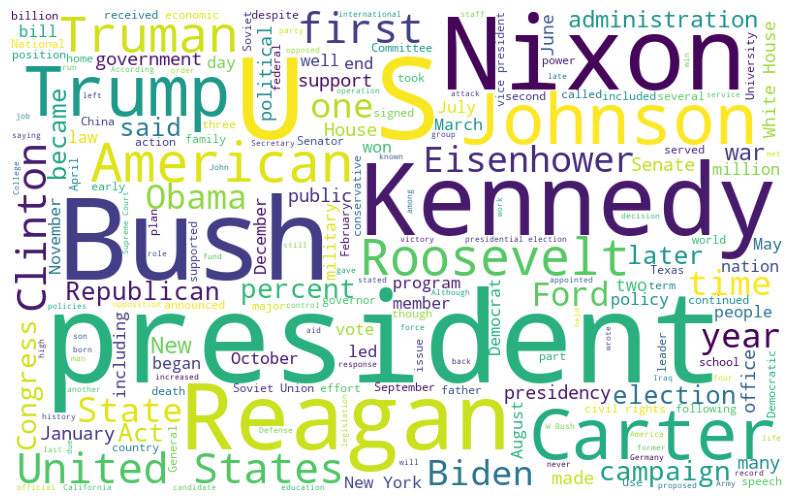

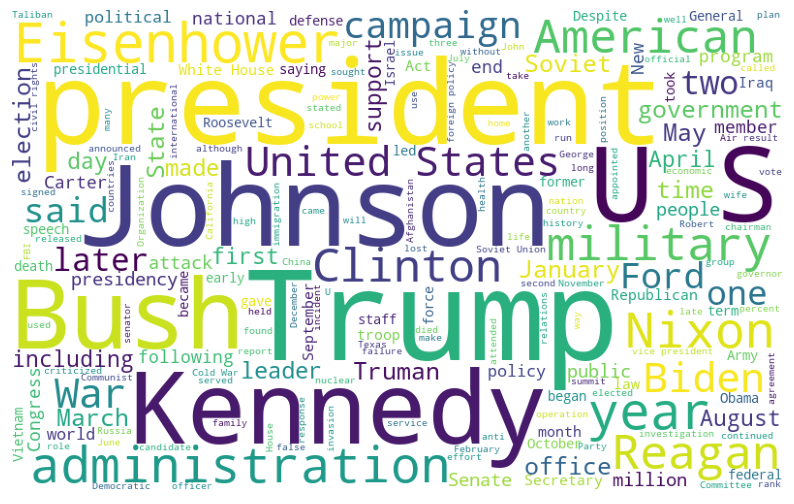

In [28]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(10,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = df.loc[df['Analysis']=='Positive','Text']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = df.loc[df['Analysis']=='Negative','Text']
create_wordcloud(negTweets)